<a href="https://colab.research.google.com/github/PranavShashidhara/Country-Default-Prediction/blob/main/Debt_default_and_Time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import lightgbm as lgb
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier

data_df = pd.read_csv('World_Bank_Cleared.csv')
data_df_copy = data_df.copy()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [56]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.5 MB/s eta 0:00:00


In [57]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'class_weight': 'balanced',
        'num_leaves': trial.suggest_int('num_leaves', 20, 60),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
        'max_depth': trial.suggest_int('max_depth', 20, 30),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 30)
    }

    model = lgb.LGBMClassifier(**param)

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in kf.split(X_resampled, y_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

    return -1 * np.mean(accuracies)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best Hyperparameters:", study.best_params)


[I 2024-12-07 21:35:09,608] A new study created in memory with name: no-name-17607762-abd6-4933-b4bc-2eb8c903b67d
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.705500312983084, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.705500312983084
[LightGBM] [Warning] lambda_l2 is set=0.705500312983084, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.705500312983084
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.705500312983084, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.705500312983084
[LightGBM] [Warning] lambda_l2 is set=0.7055003

[I 2024-12-07 21:36:30,937] Trial 0 finished with value: -0.989912594295931 and parameters: {'num_leaves': 48, 'learning_rate': 0.024643963639015568, 'n_estimators': 1244, 'max_depth': 29, 'lambda_l2': 0.705500312983084, 'min_child_samples': 23}. Best is trial 0 with value: -0.989912594295931.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.6433236999980201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6433236999980201
[LightGBM] [Warning] lambda_l2 is set=0.6433236999980201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6433236999980201
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.6433236999980201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6433236999980201
[LightGBM] [Warning] lambda_l2 is set=0.6

[I 2024-12-07 21:37:15,278] Trial 1 finished with value: -0.9902901854242927 and parameters: {'num_leaves': 52, 'learning_rate': 0.023835300319497658, 'n_estimators': 1250, 'max_depth': 23, 'lambda_l2': 0.6433236999980201, 'min_child_samples': 21}. Best is trial 1 with value: -0.9902901854242927.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.2745993329165808, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2745993329165808
[LightGBM] [Warning] lambda_l2 is set=0.2745993329165808, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2745993329165808
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.2745993329165808, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2745993329165808
[LightGBM] [Warning] lambda_l2 is set=0.2

[I 2024-12-07 21:38:04,784] Trial 2 finished with value: -0.9909375510164885 and parameters: {'num_leaves': 33, 'learning_rate': 0.04460033389527609, 'n_estimators': 1721, 'max_depth': 28, 'lambda_l2': 0.2745993329165808, 'min_child_samples': 24}. Best is trial 2 with value: -0.9909375510164885.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.5610750722819446, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5610750722819446
[LightGBM] [Warning] lambda_l2 is set=0.5610750722819446, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5610750722819446
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.5610750722819446, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5610750722819446
[LightGBM] [Warning] lambda_l2 is set=0.5

[I 2024-12-07 21:38:25,379] Trial 3 finished with value: -0.989157470239836 and parameters: {'num_leaves': 32, 'learning_rate': 0.03102772779176194, 'n_estimators': 700, 'max_depth': 25, 'lambda_l2': 0.5610750722819446, 'min_child_samples': 20}. Best is trial 2 with value: -0.9909375510164885.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.15107770484525487, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15107770484525487
[LightGBM] [Warning] lambda_l2 is set=0.15107770484525487, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15107770484525487
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.15107770484525487, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15107770484525487
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:39:15,423] Trial 4 finished with value: -0.9907217867360185 and parameters: {'num_leaves': 40, 'learning_rate': 0.04231887915795504, 'n_estimators': 1493, 'max_depth': 22, 'lambda_l2': 0.15107770484525487, 'min_child_samples': 22}. Best is trial 2 with value: -0.9909375510164885.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.26316099743427535, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.26316099743427535
[LightGBM] [Warning] lambda_l2 is set=0.26316099743427535, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.26316099743427535
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.26316099743427535, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.26316099743427535
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:39:46,453] Trial 5 finished with value: -0.990559974438284 and parameters: {'num_leaves': 37, 'learning_rate': 0.040838148276325106, 'n_estimators': 977, 'max_depth': 23, 'lambda_l2': 0.26316099743427535, 'min_child_samples': 26}. Best is trial 2 with value: -0.9909375510164885.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.14540695459715805, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14540695459715805
[LightGBM] [Warning] lambda_l2 is set=0.14540695459715805, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14540695459715805
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.14540695459715805, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14540695459715805
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:40:41,821] Trial 6 finished with value: -0.9908835990337532 and parameters: {'num_leaves': 44, 'learning_rate': 0.01857211017981052, 'n_estimators': 1630, 'max_depth': 23, 'lambda_l2': 0.14540695459715805, 'min_child_samples': 20}. Best is trial 2 with value: -0.9909375510164885.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.15653153333842518, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15653153333842518
[LightGBM] [Warning] lambda_l2 is set=0.15653153333842518, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15653153333842518
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.15653153333842518, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15653153333842518
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:41:19,094] Trial 7 finished with value: -0.9907217721858613 and parameters: {'num_leaves': 30, 'learning_rate': 0.01918462451614238, 'n_estimators': 1409, 'max_depth': 30, 'lambda_l2': 0.15653153333842518, 'min_child_samples': 27}. Best is trial 2 with value: -0.9909375510164885.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.24973257242859165, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24973257242859165
[LightGBM] [Warning] lambda_l2 is set=0.24973257242859165, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24973257242859165
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.24973257242859165, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24973257242859165
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:42:03,998] Trial 8 finished with value: -0.990559887137341 and parameters: {'num_leaves': 58, 'learning_rate': 0.020130355795866063, 'n_estimators': 1138, 'max_depth': 25, 'lambda_l2': 0.24973257242859165, 'min_child_samples': 20}. Best is trial 2 with value: -0.9909375510164885.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.41185175778565947, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41185175778565947
[LightGBM] [Warning] lambda_l2 is set=0.41185175778565947, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41185175778565947
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[I 2024-12-07 21:42:51,983] Trial 9 finished with value: -0.9903981184900779 and parameters: {'num_leaves': 51, 'learning_rate': 0.0903581665187599, 'n_estimators': 1448, 'max_depth': 22, 'lambda_l2': 0.41185175778565947, 'min_child_samples': 29}. Best is trial 2 with value: -0.9909375510164885.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.10061591882464557, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10061591882464557
[LightGBM] [Warning] lambda_l2 is set=0.10061591882464557, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10061591882464557
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.10061591882464557, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10061591882464557
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:43:33,676] Trial 10 finished with value: -0.9910993778643803 and parameters: {'num_leaves': 23, 'learning_rate': 0.07965346579209417, 'n_estimators': 1818, 'max_depth': 28, 'lambda_l2': 0.10061591882464557, 'min_child_samples': 24}. Best is trial 10 with value: -0.9910993778643803.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.10506277754447425, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10506277754447425
[LightGBM] [Warning] lambda_l2 is set=0.10506277754447425, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10506277754447425
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.10506277754447425, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10506277754447425
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:44:13,841] Trial 11 finished with value: -0.9910454258816449 and parameters: {'num_leaves': 20, 'learning_rate': 0.07902675535485985, 'n_estimators': 1883, 'max_depth': 28, 'lambda_l2': 0.10506277754447425, 'min_child_samples': 24}. Best is trial 10 with value: -0.9910993778643803.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.10808716930398903, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10808716930398903
[LightGBM] [Warning] lambda_l2 is set=0.10808716930398903, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10808716930398903
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.10808716930398903, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10808716930398903
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:44:57,156] Trial 12 finished with value: -0.9913691086777427 and parameters: {'num_leaves': 20, 'learning_rate': 0.09227993543803091, 'n_estimators': 1989, 'max_depth': 27, 'lambda_l2': 0.10808716930398903, 'min_child_samples': 25}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.1010491064235424, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1010491064235424
[LightGBM] [Warning] lambda_l2 is set=0.1010491064235424, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1010491064235424
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.1010491064235424, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1010491064235424
[LightGBM] [Warning] lambda_l2 is set=0.1

[I 2024-12-07 21:45:37,706] Trial 13 finished with value: -0.9889955706411586 and parameters: {'num_leaves': 21, 'learning_rate': 0.011045529082968065, 'n_estimators': 1949, 'max_depth': 27, 'lambda_l2': 0.1010491064235424, 'min_child_samples': 28}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.9845277603685829, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9845277603685829
[LightGBM] [Warning] lambda_l2 is set=0.9845277603685829, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9845277603685829
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.9845277603685829, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9845277603685829
[LightGBM] [Warning] lambda_l2 is set=0.9

[I 2024-12-07 21:46:22,691] Trial 14 finished with value: -0.9905059788050771 and parameters: {'num_leaves': 24, 'learning_rate': 0.0631102461871277, 'n_estimators': 1959, 'max_depth': 26, 'lambda_l2': 0.9845277603685829, 'min_child_samples': 25}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.18057853441778562, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18057853441778562
[LightGBM] [Warning] lambda_l2 is set=0.18057853441778562, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18057853441778562
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.18057853441778562, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18057853441778562
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:47:05,626] Trial 15 finished with value: -0.9909375801168029 and parameters: {'num_leaves': 27, 'learning_rate': 0.06633200757462185, 'n_estimators': 1756, 'max_depth': 20, 'lambda_l2': 0.18057853441778562, 'min_child_samples': 26}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.19999335395368775, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.19999335395368775
[LightGBM] [Warning] lambda_l2 is set=0.19999335395368775, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.19999335395368775
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.19999335395368775, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.19999335395368775
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:47:46,643] Trial 16 finished with value: -0.9913690941275857 and parameters: {'num_leaves': 26, 'learning_rate': 0.09965583968494694, 'n_estimators': 1636, 'max_depth': 30, 'lambda_l2': 0.19999335395368775, 'min_child_samples': 23}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.19923321825762413, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.19923321825762413
[LightGBM] [Warning] lambda_l2 is set=0.19923321825762413, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.19923321825762413
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.19923321825762413, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.19923321825762413
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:48:25,241] Trial 17 finished with value: -0.9909375655666457 and parameters: {'num_leaves': 26, 'learning_rate': 0.05767379493485735, 'n_estimators': 1599, 'max_depth': 30, 'lambda_l2': 0.19923321825762413, 'min_child_samples': 30}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.3722372856306485, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3722372856306485
[LightGBM] [Warning] lambda_l2 is set=0.3722372856306485, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3722372856306485
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.3722372856306485, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3722372856306485
[LightGBM] [Warning] lambda_l2 is set=0.3

[I 2024-12-07 21:48:41,599] Trial 18 finished with value: -0.9904520995731275 and parameters: {'num_leaves': 37, 'learning_rate': 0.09823498977106093, 'n_estimators': 546, 'max_depth': 26, 'lambda_l2': 0.3722372856306485, 'min_child_samples': 22}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.12946710464726813, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12946710464726813
[LightGBM] [Warning] lambda_l2 is set=0.12946710464726813, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12946710464726813
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.12946710464726813, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12946710464726813
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:49:29,931] Trial 19 finished with value: -0.9910994069646947 and parameters: {'num_leaves': 27, 'learning_rate': 0.05332972381103794, 'n_estimators': 1985, 'max_depth': 29, 'lambda_l2': 0.12946710464726813, 'min_child_samples': 26}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.21200876974035313, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21200876974035313
[LightGBM] [Warning] lambda_l2 is set=0.21200876974035313, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21200876974035313
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.21200876974035313, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21200876974035313
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:50:03,735] Trial 20 finished with value: -0.9873772876120835 and parameters: {'num_leaves': 20, 'learning_rate': 0.010220516674067334, 'n_estimators': 1644, 'max_depth': 30, 'lambda_l2': 0.21200876974035313, 'min_child_samples': 23}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.13208818086388932, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13208818086388932
[LightGBM] [Warning] lambda_l2 is set=0.13208818086388932, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13208818086388932
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.13208818086388932, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13208818086388932
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:50:54,609] Trial 21 finished with value: -0.9907757532689111 and parameters: {'num_leaves': 28, 'learning_rate': 0.05795190555356867, 'n_estimators': 1980, 'max_depth': 29, 'lambda_l2': 0.13208818086388932, 'min_child_samples': 26}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.1262249245683728, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1262249245683728
[LightGBM] [Warning] lambda_l2 is set=0.1262249245683728, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1262249245683728
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.1262249245683728, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1262249245683728
[LightGBM] [Warning] lambda_l2 is set=0.1

[I 2024-12-07 21:51:44,948] Trial 22 finished with value: -0.9912611901621149 and parameters: {'num_leaves': 34, 'learning_rate': 0.09915746971094541, 'n_estimators': 1821, 'max_depth': 29, 'lambda_l2': 0.1262249245683728, 'min_child_samples': 25}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.12161942395162446, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12161942395162446
[LightGBM] [Warning] lambda_l2 is set=0.12161942395162446, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12161942395162446
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.12161942395162446, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12161942395162446
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:52:32,782] Trial 23 finished with value: -0.9913151421448504 and parameters: {'num_leaves': 34, 'learning_rate': 0.08178673808867604, 'n_estimators': 1779, 'max_depth': 27, 'lambda_l2': 0.12161942395162446, 'min_child_samples': 25}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.17260874301965437, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17260874301965437
[LightGBM] [Warning] lambda_l2 is set=0.17260874301965437, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17260874301965437
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.17260874301965437, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17260874301965437
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:53:09,282] Trial 24 finished with value: -0.9908296761513322 and parameters: {'num_leaves': 24, 'learning_rate': 0.07670882298289565, 'n_estimators': 1543, 'max_depth': 27, 'lambda_l2': 0.17260874301965437, 'min_child_samples': 23}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.22401986301524315, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.22401986301524315
[LightGBM] [Warning] lambda_l2 is set=0.22401986301524315, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.22401986301524315
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.22401986301524315, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.22401986301524315
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:53:56,317] Trial 25 finished with value: -0.9910454404318022 and parameters: {'num_leaves': 31, 'learning_rate': 0.07185801221820122, 'n_estimators': 1720, 'max_depth': 27, 'lambda_l2': 0.22401986301524315, 'min_child_samples': 27}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.1182102246594337, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1182102246594337
[LightGBM] [Warning] lambda_l2 is set=0.1182102246594337, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1182102246594337
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.1182102246594337, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1182102246594337
[LightGBM] [Warning] lambda_l2 is set=0.1

[I 2024-12-07 21:54:50,211] Trial 26 finished with value: -0.991207281829851 and parameters: {'num_leaves': 36, 'learning_rate': 0.04864207224074925, 'n_estimators': 1831, 'max_depth': 26, 'lambda_l2': 0.1182102246594337, 'min_child_samples': 22}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.33540699018038295, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33540699018038295
[LightGBM] [Warning] lambda_l2 is set=0.33540699018038295, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33540699018038295
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.33540699018038295, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.33540699018038295
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:55:31,289] Trial 27 finished with value: -0.9906138682203907 and parameters: {'num_leaves': 42, 'learning_rate': 0.08646694533098007, 'n_estimators': 1331, 'max_depth': 24, 'lambda_l2': 0.33540699018038295, 'min_child_samples': 25}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.1737187064556326, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1737187064556326
[LightGBM] [Warning] lambda_l2 is set=0.1737187064556326, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1737187064556326
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.1737187064556326, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1737187064556326
[LightGBM] [Warning] lambda_l2 is set=0.1

[I 2024-12-07 21:55:55,469] Trial 28 finished with value: -0.9901284313271868 and parameters: {'num_leaves': 30, 'learning_rate': 0.03716315312183977, 'n_estimators': 935, 'max_depth': 27, 'lambda_l2': 0.1737187064556326, 'min_child_samples': 24}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.11234444338990089, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11234444338990089
[LightGBM] [Warning] lambda_l2 is set=0.11234444338990089, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11234444338990089
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.11234444338990089, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11234444338990089
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:56:36,879] Trial 29 finished with value: -0.9912612629129007 and parameters: {'num_leaves': 23, 'learning_rate': 0.03194678048162715, 'n_estimators': 1719, 'max_depth': 28, 'lambda_l2': 0.11234444338990089, 'min_child_samples': 23}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.14416546133416083, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14416546133416083
[LightGBM] [Warning] lambda_l2 is set=0.14416546133416083, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14416546133416083
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.14416546133416083, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.14416546133416083
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:57:41,736] Trial 30 finished with value: -0.990452055922656 and parameters: {'num_leaves': 47, 'learning_rate': 0.013268589080718662, 'n_estimators': 1896, 'max_depth': 26, 'lambda_l2': 0.14416546133416083, 'min_child_samples': 27}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.1146275124381215, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1146275124381215
[LightGBM] [Warning] lambda_l2 is set=0.1146275124381215, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1146275124381215
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.1146275124381215, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1146275124381215
[LightGBM] [Warning] lambda_l2 is set=0.1

[I 2024-12-07 21:58:21,128] Trial 31 finished with value: -0.9907218012861758 and parameters: {'num_leaves': 23, 'learning_rate': 0.03478351943756967, 'n_estimators': 1707, 'max_depth': 28, 'lambda_l2': 0.1146275124381215, 'min_child_samples': 23}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.11926140250603276, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11926140250603276
[LightGBM] [Warning] lambda_l2 is set=0.11926140250603276, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11926140250603276
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.11926140250603276, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11926140250603276
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:59:02,728] Trial 32 finished with value: -0.9910994069646947 and parameters: {'num_leaves': 25, 'learning_rate': 0.08601403984558105, 'n_estimators': 1779, 'max_depth': 29, 'lambda_l2': 0.11926140250603276, 'min_child_samples': 22}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.18716069413139302, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18716069413139302
[LightGBM] [Warning] lambda_l2 is set=0.18716069413139302, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18716069413139302
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.18716069413139302, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18716069413139302
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 21:59:43,560] Trial 33 finished with value: -0.9907217867360186 and parameters: {'num_leaves': 29, 'learning_rate': 0.03110680471103457, 'n_estimators': 1566, 'max_depth': 28, 'lambda_l2': 0.18716069413139302, 'min_child_samples': 21}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.15810255895544031, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15810255895544031
[LightGBM] [Warning] lambda_l2 is set=0.15810255895544031, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15810255895544031
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.15810255895544031, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15810255895544031
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 22:00:09,576] Trial 34 finished with value: -0.9896968445656181 and parameters: {'num_leaves': 22, 'learning_rate': 0.02505299771559612, 'n_estimators': 1223, 'max_depth': 29, 'lambda_l2': 0.15810255895544031, 'min_child_samples': 24}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.1340950792362098, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1340950792362098
[LightGBM] [Warning] lambda_l2 is set=0.1340950792362098, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1340950792362098
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.1340950792362098, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1340950792362098
[LightGBM] [Warning] lambda_l2 is set=0.1

[I 2024-12-07 22:00:56,504] Trial 35 finished with value: -0.9909914884490666 and parameters: {'num_leaves': 34, 'learning_rate': 0.0679576005129697, 'n_estimators': 1664, 'max_depth': 27, 'lambda_l2': 0.1340950792362098, 'min_child_samples': 25}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.49952655207319946, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.49952655207319946
[LightGBM] [Warning] lambda_l2 is set=0.49952655207319946, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.49952655207319946
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.49952655207319946, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.49952655207319946
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 22:01:28,310] Trial 36 finished with value: -0.9889416768590518 and parameters: {'num_leaves': 25, 'learning_rate': 0.014975367274206484, 'n_estimators': 1377, 'max_depth': 30, 'lambda_l2': 0.49952655207319946, 'min_child_samples': 21}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.29115138254348333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.29115138254348333
[LightGBM] [Warning] lambda_l2 is set=0.29115138254348333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.29115138254348333
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.29115138254348333, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.29115138254348333
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 22:02:21,587] Trial 37 finished with value: -0.9906678202031258 and parameters: {'num_leaves': 32, 'learning_rate': 0.027373750908974082, 'n_estimators': 1887, 'max_depth': 25, 'lambda_l2': 0.29115138254348333, 'min_child_samples': 24}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.11299426079243659, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11299426079243659
[LightGBM] [Warning] lambda_l2 is set=0.11299426079243659, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11299426079243659
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.11299426079243659, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11299426079243659
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 22:03:07,092] Trial 38 finished with value: -0.9907218449366472 and parameters: {'num_leaves': 39, 'learning_rate': 0.049523159160714474, 'n_estimators': 1493, 'max_depth': 28, 'lambda_l2': 0.11299426079243659, 'min_child_samples': 23}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.15654855227687617, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15654855227687617
[LightGBM] [Warning] lambda_l2 is set=0.15654855227687617, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15654855227687617
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.15654855227687617, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15654855227687617
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 22:03:49,043] Trial 39 finished with value: -0.9913151421448504 and parameters: {'num_leaves': 28, 'learning_rate': 0.09763562606937808, 'n_estimators': 1702, 'max_depth': 24, 'lambda_l2': 0.15654855227687617, 'min_child_samples': 25}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.23975277152390737, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.23975277152390737
[LightGBM] [Warning] lambda_l2 is set=0.23975277152390737, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.23975277152390737
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[I 2024-12-07 22:04:26,516] Trial 40 finished with value: -0.9910993633142231 and parameters: {'num_leaves': 60, 'learning_rate': 0.09128170833960715, 'n_estimators': 1040, 'max_depth': 24, 'lambda_l2': 0.23975277152390737, 'min_child_samples': 25}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.1481195005099656, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1481195005099656
[LightGBM] [Warning] lambda_l2 is set=0.1481195005099656, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1481195005099656
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.1481195005099656, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1481195005099656
[LightGBM] [Warning] lambda_l2 is set=0.1

[I 2024-12-07 22:05:10,702] Trial 41 finished with value: -0.9909915029992238 and parameters: {'num_leaves': 28, 'learning_rate': 0.09931178288231168, 'n_estimators': 1709, 'max_depth': 24, 'lambda_l2': 0.1481195005099656, 'min_child_samples': 26}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.1527651653532331, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1527651653532331
[LightGBM] [Warning] lambda_l2 is set=0.1527651653532331, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1527651653532331
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.1527651653532331, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1527651653532331
[LightGBM] [Warning] lambda_l2 is set=0.1

[I 2024-12-07 22:05:51,692] Trial 42 finished with value: -0.9907757532689111 and parameters: {'num_leaves': 22, 'learning_rate': 0.07416422288543192, 'n_estimators': 1891, 'max_depth': 25, 'lambda_l2': 0.1527651653532331, 'min_child_samples': 25}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.10927925212927833, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10927925212927833
[LightGBM] [Warning] lambda_l2 is set=0.10927925212927833, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10927925212927833
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.10927925212927833, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10927925212927833
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 22:06:39,106] Trial 43 finished with value: -0.9910994069646947 and parameters: {'num_leaves': 33, 'learning_rate': 0.08994683148269537, 'n_estimators': 1775, 'max_depth': 22, 'lambda_l2': 0.10927925212927833, 'min_child_samples': 23}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.1649571482892789, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1649571482892789
[LightGBM] [Warning] lambda_l2 is set=0.1649571482892789, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1649571482892789
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.1649571482892789, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1649571482892789
[LightGBM] [Warning] lambda_l2 is set=0.1

[I 2024-12-07 22:07:09,624] Trial 44 finished with value: -0.9910454549819592 and parameters: {'num_leaves': 20, 'learning_rate': 0.07970028622764445, 'n_estimators': 1508, 'max_depth': 25, 'lambda_l2': 0.1649571482892789, 'min_child_samples': 24}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.13668632649634838, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13668632649634838
[LightGBM] [Warning] lambda_l2 is set=0.13668632649634838, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13668632649634838
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.13668632649634838, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13668632649634838
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 22:07:49,580] Trial 45 finished with value: -0.9907757387187539 and parameters: {'num_leaves': 26, 'learning_rate': 0.05871113764459478, 'n_estimators': 1633, 'max_depth': 23, 'lambda_l2': 0.13668632649634838, 'min_child_samples': 27}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.12187020748259876, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12187020748259876
[LightGBM] [Warning] lambda_l2 is set=0.12187020748259876, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12187020748259876
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.12187020748259876, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.12187020748259876
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 22:08:34,879] Trial 46 finished with value: -0.9910454549819592 and parameters: {'num_leaves': 30, 'learning_rate': 0.0825808197583341, 'n_estimators': 1824, 'max_depth': 27, 'lambda_l2': 0.12187020748259876, 'min_child_samples': 22}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.10174675169021351, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10174675169021351
[LightGBM] [Warning] lambda_l2 is set=0.10174675169021351, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10174675169021351
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.10174675169021351, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10174675169021351
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 22:09:15,835] Trial 47 finished with value: -0.9909375364663313 and parameters: {'num_leaves': 22, 'learning_rate': 0.04321192294970928, 'n_estimators': 1921, 'max_depth': 26, 'lambda_l2': 0.10174675169021351, 'min_child_samples': 28}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.20271827123139188, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20271827123139188
[LightGBM] [Warning] lambda_l2 is set=0.20271827123139188, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20271827123139188
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.20271827123139188, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20271827123139188
[LightGBM] [Warning] lambda_l2 is s

[I 2024-12-07 22:09:57,186] Trial 48 finished with value: -0.99072183038649 and parameters: {'num_leaves': 36, 'learning_rate': 0.021346547797564872, 'n_estimators': 1438, 'max_depth': 28, 'lambda_l2': 0.20271827123139188, 'min_child_samples': 24}. Best is trial 12 with value: -0.9913691086777427.
<ipython-input-57-856fb1d752f5>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
<ipython-input-57-856fb1d752f5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 0.1, 1),


[LightGBM] [Warning] lambda_l2 is set=0.9771291270610669, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9771291270610669
[LightGBM] [Warning] lambda_l2 is set=0.9771291270610669, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9771291270610669
[LightGBM] [Info] Number of positive: 1369, number of negative: 13461
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5458
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l2 is set=0.9771291270610669, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9771291270610669
[LightGBM] [Warning] lambda_l2 is set=0.9771291270610669, reg_lambda=0.0 will be ignored. Current value: 

[I 2024-12-07 22:10:18,087] Trial 49 finished with value: -0.9899665753789806 and parameters: {'num_leaves': 24, 'learning_rate': 0.06430734511200217, 'n_estimators': 856, 'max_depth': 30, 'lambda_l2': 0.9771291270610669, 'min_child_samples': 26}. Best is trial 12 with value: -0.9913691086777427.


Best Hyperparameters: {'num_leaves': 20, 'learning_rate': 0.09227993543803091, 'n_estimators': 1989, 'max_depth': 27, 'lambda_l2': 0.10808716930398903, 'min_child_samples': 25}


In [58]:
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import ADASYN

X = data_df.drop(columns = ['DEFAULT', 'Country','Unnamed: 0'], axis=1)
y = data_df['DEFAULT']

adasyn = ADASYN(sampling_strategy=0.1, random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

X_resampled['Year'] = pd.to_numeric(X_resampled['Year'], errors='coerce')
X_resampled = X_resampled.dropna()

X_resampled.columns = X_resampled.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    metric='binary_logloss',
    num_leaves=20,
    learning_rate=0.09227993543803091,
    min_split_gain=0.001,
    min_child_samples=25,
    n_estimators=1989,
    lambda_l2=0.10808716930398903,
    max_depth=27,
    random_state=42
)


kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X_resampled, y_resampled), start=1):
    print(f"\nFold {fold}:")

    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

    evals_result = {}  # Store evaluation results for loss tracking

    model.fit(X_train, y_train,
              eval_set=[(X_train, y_train), (X_val, y_val)],  # Only use validation set during training
              eval_names=['training', 'valid_0'],
              eval_metric='binary_logloss',  # Track binary log loss
              callbacks=[lgb.early_stopping(stopping_rounds=10),
                         lgb.record_evaluation(evals_result),
                         lgb.log_evaluation(period=100)])


    train_loss = evals_result['training']['binary_logloss']
    val_loss = evals_result['valid_0']['binary_logloss']  # Valid_0 corresponds to the validation set

    for i in range(min(500, len(train_loss))):  # Ensure not to exceed available iterations
        if (i+1) % 100 == 0:
            print(f"Iteration {i+1}: Train Loss = {train_loss[i]:.4f}, Validation Loss = {val_loss[i]:.4f}")

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on Test Set: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Fold 1:
[LightGBM] [Warning] lambda_l2 is set=0.10808716930398903, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10808716930398903
[LightGBM] [Warning] lambda_l2 is set=0.10808716930398903, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10808716930398903
[LightGBM] [Info] Number of positive: 1095, number of negative: 10769
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5451
[LightGBM] [Info] Number of data points in the train set: 11864, number of used features: 23
[LightGBM] [Warning] lambda_l2 is set=0.10808716930398903, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.10808716930398903
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training until validation sc

# Do Time series Analysis Later

In [ ]:
from statsmodels.tsa.stattools import adfuller

if 'CURRENT_GDP_USD' in data_df.columns:
    gdp_series = data_df['CURRENT_GDP_USD'].dropna()
    if not gdp_series.empty:
      result = adfuller(gdp_series)
      print('ADF Statistic: %f' % result[0])
      print('p-value: %f' % result[1])
      print('Critical Values:')
      for key, value in result[4].items():
          print('\t%s: %.3f' % (key, value))
    else:
      print("GDP series is empty after dropping NaN values.  Cannot perform ADF test.")
else:
    print("Column 'GDP' not found in the dataframe.")

ADF Statistic: -17.343751
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [ ]:
data_df.columns.to_list()

['Unnamed: 0',
 'Country',
 'Year',
 'CURRENT_GDP_USD',
 'GDP_GROWTH_PCT',
 'ANUAL_INFLATION_PCT',
 'TOT_EXT_DEBT_USD',
 'TOT_GOVT_DEBT_LCU',
 'LONG_EXT_DEBT_USD',
 'PUBLIC_OWNED_DEBT_USD',
 'PRIVATE_OWNED_DEBT_USD',
 'SHORT_TERM_EXT_DEBT',
 'CUR_VAL_EXT_DEBT',
 'EXPORTS',
 'IMPORTS',
 'TAX_REVENUE_PCT_GDP',
 'UNEMPLOYMENT_RATE',
 'POP_GROWTH_RATE',
 'DEBT_TO_GDP',
 'TRADE_BALANCE',
 'TRADE_BAL_PCT_GDP',
 'INFLATION_RATE_IN_PCT',
 'REAL_GDP_GROWTH',
 'ANNUAL_INFLATION_PCT',
 'DEFAULT',
 'Country_TargetEncoded']

In [ ]:
data_df[['Country', 'Year', 'CURRENT_GDP_USD', 'INFLATION_RATE_IN_PCT', 'TOT_EXT_DEBT_USD', 'TOT_GOVT_DEBT_LCU', 'LONG_EXT_DEBT_USD', 'PUBLIC_OWNED_DEBT_USD', 'PRIVATE_OWNED_DEBT_USD', 'SHORT_TERM_EXT_DEBT',\
    'CUR_VAL_EXT_DEBT', 'EXPORTS', 'IMPORTS', 'TAX_REVENUE_PCT_GDP', 'UNEMPLOYMENT_RATE', 'POP_GROWTH_RATE', 'DEBT_TO_GDP', 'TRADE_BALANCE', 'TRADE_BAL_PCT_GDP', 'DEFAULT']]

,Country,Year,CURRENT_GDP_USD,INFLATION_RATE_IN_PCT,TOT_EXT_DEBT_USD,TOT_GOVT_DEBT_LCU,LONG_EXT_DEBT_USD,PUBLIC_OWNED_DEBT_USD,PRIVATE_OWNED_DEBT_USD,SHORT_TERM_EXT_DEBT,CUR_VAL_EXT_DEBT,EXPORTS,IMPORTS,TAX_REVENUE_PCT_GDP,UNEMPLOYMENT_RATE,POP_GROWTH_RATE,DEBT_TO_GDP,TRADE_BALANCE,TRADE_BAL_PCT_GDP,DEFAULT
0,Zimbabwe,1960,1.052990e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.0
1,Zambia,1960,7.130000e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.0
2,"Yemen, Rep.",1960,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.0
3,West Bank and Gaza,1960,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.0
4,Virgin Islands (U.S.),1960,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17019,Central Europe and the Baltics,2023,2.252971e+12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.423281e+12,1.353390e+12,0.0,4.081257,0.048294,0.0,6.989083e+10,3.102163,0.0
17020,Caribbean small states,2023,5.325264e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,9.913604,0.657154,0.0,0.000000e+00,0.000000,0.0
17021,Arab World,2023,3.491517e+12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,9.878318,1.847955,0.0,0.000000e+00,0.000000,0.0
17022,Africa Western and Central,2023,7.965862e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,3.397782,2.540864,0.0,0.000000e+00,0.000000,0.0


In [ ]:
import pandas as pd
from statsmodels.tsa.vector_ar.var_model import VAR
import numpy as np

if {'Country', 'Year', 'CURRENT_GDP_USD', 'INFLATION_RATE_IN_PCT', 'TOT_EXT_DEBT_USD', 'TOT_GOVT_DEBT_LCU', 'LONG_EXT_DEBT_USD', 'PUBLIC_OWNED_DEBT_USD', 'PRIVATE_OWNED_DEBT_USD', 'SHORT_TERM_EXT_DEBT',\
    'CUR_VAL_EXT_DEBT', 'EXPORTS', 'IMPORTS', 'TAX_REVENUE_PCT_GDP', 'UNEMPLOYMENT_RATE', 'POP_GROWTH_RATE', 'DEBT_TO_GDP', 'TRADE_BALANCE', 'TRADE_BAL_PCT_GDP', 'DEFAULT'}.issubset(data_df.columns):
    country_data = data_df[['Country', 'Year', 'CURRENT_GDP_USD', 'INFLATION_RATE_IN_PCT', 'TOT_EXT_DEBT_USD', 'TOT_GOVT_DEBT_LCU', 'LONG_EXT_DEBT_USD', 'PUBLIC_OWNED_DEBT_USD', 'PRIVATE_OWNED_DEBT_USD', 'SHORT_TERM_EXT_DEBT',\
    'CUR_VAL_EXT_DEBT', 'EXPORTS', 'IMPORTS', 'TAX_REVENUE_PCT_GDP', 'UNEMPLOYMENT_RATE', 'POP_GROWTH_RATE', 'DEBT_TO_GDP', 'TRADE_BALANCE', 'TRADE_BAL_PCT_GDP', 'DEFAULT']].copy()
    country_groups = country_data.groupby('Country')
    for country, country_df in country_groups:
        country_df = country_df.fillna(0)
        country_df['Year'] = pd.to_datetime(country_df['Year'], errors='coerce')
        country_df = country_df.set_index('Year')
        var_columns = ['CURRENT_GDP_USD', 'INFLATION_RATE_IN_PCT', 'TOT_EXT_DEBT_USD', 'TOT_GOVT_DEBT_LCU', 'LONG_EXT_DEBT_USD', 'PUBLIC_OWNED_DEBT_USD', 'PRIVATE_OWNED_DEBT_USD', 'SHORT_TERM_EXT_DEBT',\
        'CUR_VAL_EXT_DEBT', 'EXPORTS', 'IMPORTS', 'TAX_REVENUE_PCT_GDP', 'UNEMPLOYMENT_RATE', 'POP_GROWTH_RATE', 'DEBT_TO_GDP', 'TRADE_BALANCE', 'TRADE_BAL_PCT_GDP', 'DEFAULT']
        country_var_data = country_df[var_columns]
        if len(country_var_data) >= 5:
            try:
                model = VAR(country_var_data)
                maxlags = min(10, int(len(country_var_data)**0.5) - 1, len(country_var_data) // len(var_columns) - 1)
                maxlags = max(1, maxlags)
                if maxlags > 0:
                    results = model.select_order(maxlags=maxlags)
                results_fitted = model.fit(results.aic)
                forecast = results_fitted.forecast(country_var_data.values[-results.aic:], steps=5)
                forecast_df = pd.DataFrame(forecast, columns=var_columns, index=pd.date_range(start=country_df.index[-1] + pd.DateOffset(years=1), periods=5, freq='Y'))
                default_years = forecast_df[forecast_df['DEFAULT'] > 0.5].index.tolist()
                print(f"Predictions for {country}:")
                print(forecast_df)
                print(f"Potential Default Years: {default_years}")
            except np.linalg.LinAlgError:
                print(f"LinAlgError encountered for {country}. Skipping...")
            except ValueError as e:
                if "maxlags is too large for the number of observations and the number of equations" in str(e):
                  print(f"Insufficient data for VAR modeling for {country} with maxlags={maxlags}. Skipping...")
                else:
                  print(f"ValueError encountered for {country}: {e}. Skipping...")
        else:
            print(f"Not enough data for VAR modeling for {country}")
else:
    print("Necessary columns not found in the dataframe")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for Afghanistan. Skipping...
LinAlgError encountered for Africa Eastern and Southern. Skipping...
LinAlgError encountered for Africa Western and Central. Skipping...
LinAlgError encountered for Albania. Skipping...
LinAlgError encountered for Algeria. Skipping...
LinAlgError encountered for American Samoa. Skipping...
LinAlgError encountered for Andorra. Skipping...
LinAlgError encountered for Angola. Skipping...
LinAlgError encountered for Antigua and Barbuda. Skipping...
LinAlgError encountered for Arab World. Skipping...
LinAlgError encountered for Argentina. Skipping...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for Armenia. Skipping...
LinAlgError encountered for Aruba. Skipping...
LinAlgError encountered for Australia. Skipping...
LinAlgError encountered for Austria. Skipping...
LinAlgError encountered for Azerbaijan. Skipping...
LinAlgError encountered for Bahamas, The. Skipping...
LinAlgError encountered for Bahrain. Skipping...
LinAlgError encountered for Bangladesh. Skipping...
LinAlgError encountered for Barbados. Skipping...
LinAlgError encountered for Belarus. Skipping...
LinAlgError encountered for Belgium. Skipping...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for Belize. Skipping...
LinAlgError encountered for Benin. Skipping...
LinAlgError encountered for Bermuda. Skipping...
LinAlgError encountered for Bhutan. Skipping...
LinAlgError encountered for Bolivia. Skipping...
LinAlgError encountered for Bosnia and Herzegovina. Skipping...
LinAlgError encountered for Botswana. Skipping...
Predictions for Brazil:
                               CURRENT_GDP_USD  INFLATION_RATE_IN_PCT  \
1971-12-31 00:00:00.000002023     2.938311e+12             -69.149968   
1972-12-31 00:00:00.000002023     2.883513e+12             691.444864   
1973-12-31 00:00:00.000002023     3.294598e+12              95.488742   
1974-12-31 00:00:00.000002023     2.980443e+12             222.121578   
1975-12-31 00:00:00.000002023     2.903183e+12            -564.948111   

                               TOT_EXT_DEBT_USD  TOT_GOVT_DEBT_LCU  \
1971-12-31 00:00:00.000002023      1.144825e+11      -1.540765e+12   
1972-12-31 00:00:00.000002023     -2.85375

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
<ipython-input-89-d4af109be29e>:26: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_df = pd.DataFrame(forecast, columns=var_co

LinAlgError encountered for Burkina Faso. Skipping...
LinAlgError encountered for Burundi. Skipping...
LinAlgError encountered for Cabo Verde. Skipping...
LinAlgError encountered for Cambodia. Skipping...
Predictions for Cameroon:
                               CURRENT_GDP_USD  INFLATION_RATE_IN_PCT  \
1971-12-31 00:00:00.000002023     4.053272e+10               7.462086   
1972-12-31 00:00:00.000002023     3.957846e+10               1.762035   
1973-12-31 00:00:00.000002023     4.188140e+10              -2.426441   
1974-12-31 00:00:00.000002023     4.649014e+10              -2.061743   
1975-12-31 00:00:00.000002023     5.079236e+10               0.721136   

                               TOT_EXT_DEBT_USD  TOT_GOVT_DEBT_LCU  \
1971-12-31 00:00:00.000002023      3.706683e+09       2.313819e+12   
1972-12-31 00:00:00.000002023      9.202708e+09       1.234263e+12   
1973-12-31 00:00:00.000002023      1.582352e+10       4.838623e+11   
1974-12-31 00:00:00.000002023      1.984862e+10   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for Colombia. Skipping...
LinAlgError encountered for Comoros. Skipping...
LinAlgError encountered for Congo, Dem. Rep.. Skipping...
LinAlgError encountered for Congo, Rep.. Skipping...
LinAlgError encountered for Costa Rica. Skipping...
LinAlgError encountered for Cote d'Ivoire. Skipping...
LinAlgError encountered for Croatia. Skipping...
LinAlgError encountered for Cuba. Skipping...
LinAlgError encountered for Curacao. Skipping...
LinAlgError encountered for Cyprus. Skipping...
LinAlgError encountered for Czechia. Skipping...
LinAlgError encountered for Denmark. Skipping...
LinAlgError encountered for Djibouti. Skipping...
LinAlgError encountered for Dominica. Skipping...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for Dominican Republic. Skipping...
LinAlgError encountered for Early-demographic dividend. Skipping...
LinAlgError encountered for East Asia & Pacific. Skipping...
LinAlgError encountered for East Asia & Pacific (IDA & IBRD countries). Skipping...
LinAlgError encountered for East Asia & Pacific (excluding high income). Skipping...
LinAlgError encountered for Ecuador. Skipping...
LinAlgError encountered for Egypt, Arab Rep.. Skipping...
LinAlgError encountered for El Salvador. Skipping...
LinAlgError encountered for Equatorial Guinea. Skipping...
LinAlgError encountered for Eritrea. Skipping...
LinAlgError encountered for Estonia. Skipping...
LinAlgError encountered for Eswatini. Skipping...
LinAlgError encountered for Ethiopia. Skipping...
LinAlgError encountered for Euro area. Skipping...
LinAlgError encountered for Europe & Central Asia. Skipping...
LinAlgError encountered for Europe & Central Asia (IDA & IBRD countries). Skipping...
LinAlgError encountered f

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for Finland. Skipping...
LinAlgError encountered for Fragile and conflict affected situations. Skipping...
LinAlgError encountered for France. Skipping...
LinAlgError encountered for French Polynesia. Skipping...
LinAlgError encountered for Gabon. Skipping...
LinAlgError encountered for Gambia, The. Skipping...
LinAlgError encountered for Georgia. Skipping...
LinAlgError encountered for Germany. Skipping...
LinAlgError encountered for Ghana. Skipping...
LinAlgError encountered for Gibraltar. Skipping...
LinAlgError encountered for Greece. Skipping...
LinAlgError encountered for Greenland. Skipping...
LinAlgError encountered for Grenada. Skipping...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for Guam. Skipping...
LinAlgError encountered for Guatemala. Skipping...
LinAlgError encountered for Guinea. Skipping...
LinAlgError encountered for Guinea-Bissau. Skipping...
LinAlgError encountered for Guyana. Skipping...
LinAlgError encountered for Haiti. Skipping...
LinAlgError encountered for Heavily indebted poor countries (HIPC). Skipping...
LinAlgError encountered for High income. Skipping...
LinAlgError encountered for Honduras. Skipping...
LinAlgError encountered for Hong Kong SAR, China. Skipping...
LinAlgError encountered for Hungary. Skipping...
LinAlgError encountered for IBRD only. Skipping...
LinAlgError encountered for IDA & IBRD total. Skipping...

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date


LinAlgError encountered for IDA blend. Skipping...
LinAlgError encountered for IDA only. Skipping...
LinAlgError encountered for IDA total. Skipping...
LinAlgError encountered for Iceland. Skipping...
LinAlgError encountered for India. Skipping...
LinAlgError encountered for Indonesia. Skipping...
LinAlgError encountered for Iran, Islamic Rep.. Skipping...
LinAlgError encountered for Iraq. Skipping...
LinAlgError encountered for Ireland. Skipping...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for Isle of Man. Skipping...
LinAlgError encountered for Israel. Skipping...
LinAlgError encountered for Italy. Skipping...
LinAlgError encountered for Jamaica. Skipping...
LinAlgError encountered for Japan. Skipping...
LinAlgError encountered for Jordan. Skipping...

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date


LinAlgError encountered for Kazakhstan. Skipping...
LinAlgError encountered for Kenya. Skipping...
LinAlgError encountered for Kiribati. Skipping...
LinAlgError encountered for Korea, Dem. People's Rep.. Skipping...
LinAlgError encountered for Korea, Rep.. Skipping...
LinAlgError encountered for Kosovo. Skipping...
LinAlgError encountered for Kuwait. Skipping...
LinAlgError encountered for Kyrgyz Republic. Skipping...
LinAlgError encountered for Lao PDR. Skipping...
LinAlgError encountered for Late-demographic dividend. Skipping...
LinAlgError encountered for Latin America & Caribbean. Skipping...
LinAlgError encountered for Latin America & Caribbean (excluding high income). Skipping...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for Latin America & the Caribbean (IDA & IBRD countries). Skipping...
LinAlgError encountered for Latvia. Skipping...
LinAlgError encountered for Least developed countries: UN classification. Skipping...
LinAlgError encountered for Lebanon. Skipping...
LinAlgError encountered for Lesotho. Skipping...
LinAlgError encountered for Liberia. Skipping...
LinAlgError encountered for Libya. Skipping...
LinAlgError encountered for Liechtenstein. Skipping...
LinAlgError encountered for Lithuania. Skipping...
LinAlgError encountered for Low & middle income. Skipping...
LinAlgError encountered for Low income. Skipping...
LinAlgError encountered for Lower middle income. Skipping...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for Luxembourg. Skipping...
LinAlgError encountered for Macao SAR, China. Skipping...
LinAlgError encountered for Madagascar. Skipping...
LinAlgError encountered for Malawi. Skipping...
LinAlgError encountered for Malaysia. Skipping...
LinAlgError encountered for Maldives. Skipping...
LinAlgError encountered for Mali. Skipping...
LinAlgError encountered for Malta. Skipping...
LinAlgError encountered for Marshall Islands. Skipping...
LinAlgError encountered for Mauritania. Skipping...
LinAlgError encountered for Mauritius. Skipping...
LinAlgError encountered for Mexico. Skipping...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for Micronesia, Fed. Sts.. Skipping...
LinAlgError encountered for Middle East & North Africa. Skipping...
LinAlgError encountered for Middle East & North Africa (IDA & IBRD countries). Skipping...
LinAlgError encountered for Middle East & North Africa (excluding high income). Skipping...
LinAlgError encountered for Middle income. Skipping...
LinAlgError encountered for Moldova. Skipping...
LinAlgError encountered for Monaco. Skipping...
LinAlgError encountered for Mongolia. Skipping...
LinAlgError encountered for Montenegro. Skipping...
LinAlgError encountered for Morocco. Skipping...
LinAlgError encountered for Mozambique. Skipping...
LinAlgError encountered for Myanmar. Skipping...
LinAlgError encountered for Namibia. Skipping...
LinAlgError encountered for Nauru. Skipping...

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date


LinAlgError encountered for Nepal. Skipping...
LinAlgError encountered for Netherlands. Skipping...
LinAlgError encountered for New Caledonia. Skipping...
LinAlgError encountered for New Zealand. Skipping...
LinAlgError encountered for Nicaragua. Skipping...
LinAlgError encountered for Niger. Skipping...
LinAlgError encountered for Nigeria. Skipping...
LinAlgError encountered for North America. Skipping...
LinAlgError encountered for North Macedonia. Skipping...
LinAlgError encountered for Northern Mariana Islands. Skipping...
LinAlgError encountered for Norway. Skipping...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for Not classified. Skipping...
LinAlgError encountered for OECD members. Skipping...
LinAlgError encountered for Oman. Skipping...
LinAlgError encountered for Other small states. Skipping...
LinAlgError encountered for Pacific island small states. Skipping...
LinAlgError encountered for Pakistan. Skipping...
LinAlgError encountered for Palau. Skipping...
LinAlgError encountered for Panama. Skipping...
LinAlgError encountered for Papua New Guinea. Skipping...
LinAlgError encountered for Paraguay. Skipping...
LinAlgError encountered for Peru. Skipping...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for Philippines. Skipping...
LinAlgError encountered for Poland. Skipping...
LinAlgError encountered for Portugal. Skipping...
LinAlgError encountered for Post-demographic dividend. Skipping...
LinAlgError encountered for Pre-demographic dividend. Skipping...
LinAlgError encountered for Puerto Rico. Skipping...
LinAlgError encountered for Qatar. Skipping...
LinAlgError encountered for Romania. Skipping...
LinAlgError encountered for Russian Federation. Skipping...
LinAlgError encountered for Rwanda. Skipping...
LinAlgError encountered for Samoa. Skipping...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for San Marino. Skipping...
LinAlgError encountered for Sao Tome and Principe. Skipping...
LinAlgError encountered for Saudi Arabia. Skipping...
LinAlgError encountered for Senegal. Skipping...
LinAlgError encountered for Serbia. Skipping...
LinAlgError encountered for Seychelles. Skipping...
LinAlgError encountered for Sierra Leone. Skipping...
LinAlgError encountered for Singapore. Skipping...
LinAlgError encountered for Sint Maarten (Dutch part). Skipping...
LinAlgError encountered for Slovak Republic. Skipping...
LinAlgError encountered for Slovenia. Skipping...
LinAlgError encountered for Small states. Skipping...
LinAlgError encountered for Solomon Islands. Skipping...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for Somalia. Skipping...
LinAlgError encountered for South Africa. Skipping...
LinAlgError encountered for South Asia. Skipping...
LinAlgError encountered for South Asia (IDA & IBRD). Skipping...
LinAlgError encountered for South Sudan. Skipping...
LinAlgError encountered for Spain. Skipping...
LinAlgError encountered for Sri Lanka. Skipping...
LinAlgError encountered for St. Kitts and Nevis. Skipping...
LinAlgError encountered for St. Lucia. Skipping...
LinAlgError encountered for St. Martin (French part). Skipping...
LinAlgError encountered for St. Vincent and the Grenadines. Skipping...
LinAlgError encountered for Sub-Saharan Africa. Skipping...
LinAlgError encountered for Sub-Saharan Africa (IDA & IBRD countries). Skipping...
LinAlgError encountered for Sub-Saharan Africa (excluding high income). Skipping...
LinAlgError encountered for Sudan. Skipping...
LinAlgError encountered for Suriname. Skipping...
LinAlgError encountered for Sweden. Skipping...
LinAlgE

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for Trinidad and Tobago. Skipping...
LinAlgError encountered for Tunisia. Skipping...
LinAlgError encountered for Turkiye. Skipping...
LinAlgError encountered for Turkmenistan. Skipping...
LinAlgError encountered for Turks and Caicos Islands. Skipping...
LinAlgError encountered for Tuvalu. Skipping...
LinAlgError encountered for Uganda. Skipping...
LinAlgError encountered for Ukraine. Skipping...
LinAlgError encountered for United Arab Emirates. Skipping...
LinAlgError encountered for United Kingdom. Skipping...
LinAlgError encountered for United States. Skipping...
LinAlgError encountered for Upper middle income. Skipping...

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date


LinAlgError encountered for Uruguay. Skipping...
LinAlgError encountered for Uzbekistan. Skipping...
LinAlgError encountered for Vanuatu. Skipping...
LinAlgError encountered for Venezuela, RB. Skipping...
LinAlgError encountered for Viet Nam. Skipping...
LinAlgError encountered for Virgin Islands (U.S.). Skipping...
LinAlgError encountered for West Bank and Gaza. Skipping...
LinAlgError encountered for World. Skipping...
LinAlgError encountered for Yemen, Rep.. Skipping...
LinAlgError encountered for Zambia. Skipping...
LinAlgError encountered for Zimbabwe. Skipping...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

In [ ]:
data_df[data_df['Country']=='Afghanistan']

,Unnamed: 0,Country,Year,CURRENT_GDP_USD,GDP_GROWTH_PCT,ANUAL_INFLATION_PCT,TOT_EXT_DEBT_USD,TOT_GOVT_DEBT_LCU,LONG_EXT_DEBT_USD,PUBLIC_OWNED_DEBT_USD,...,UNEMPLOYMENT_RATE,POP_GROWTH_RATE,DEBT_TO_GDP,TRADE_BALANCE,TRADE_BAL_PCT_GDP,INFLATION_RATE_IN_PCT,REAL_GDP_GROWTH,ANNUAL_INFLATION_PCT,DEFAULT,Country_TargetEncoded
216,216,Afghanistan,1960,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000,0.000000,0.000000,-1.555555e+07,0.000000,0.000000,0.000000,0.000000,0.0,0.0
482,482,Afghanistan,1961,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000,1.925952,0.000000,-1.999999e+07,0.000000,0.000000,0.000000,0.000000,0.0,0.0
748,748,Afghanistan,1962,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000,2.014879,0.000000,-2.444443e+07,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1014,1014,Afghanistan,1963,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000,2.078997,0.000000,-5.777780e+07,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1280,1280,Afghanistan,1964,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000,2.139651,0.000000,-7.333331e+07,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,15910,Afghanistan,2019,1.879944e+10,3.911603,149.895975,2.661686e+09,0.0,1.964901e+09,1.943608e+09,...,11.224,2.908529,0.141583,0.000000e+00,0.000000,2.302373,1.609231,149.895975,0.0,0.0
16176,16176,Afghanistan,2020,1.995593e+10,-2.351101,0.000000,3.040072e+09,0.0,1.976198e+09,1.958450e+09,...,11.710,3.134747,0.152339,-5.162252e+09,-25.868260,0.000000,0.000000,0.000000,0.0,0.0
16442,16442,Afghanistan,2021,1.426650e+10,-20.738839,0.000000,3.555784e+09,0.0,1.925714e+09,1.907966e+09,...,11.934,2.851358,0.249240,-3.242406e+09,-22.727411,0.000000,0.000000,0.000000,0.0,0.0
16708,16708,Afghanistan,2022,1.450216e+10,-6.240172,0.000000,3.393247e+09,0.0,1.877151e+09,1.859403e+09,...,14.100,2.534498,0.233982,-5.238960e+09,-36.125385,0.000000,0.000000,0.000000,0.0,0.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

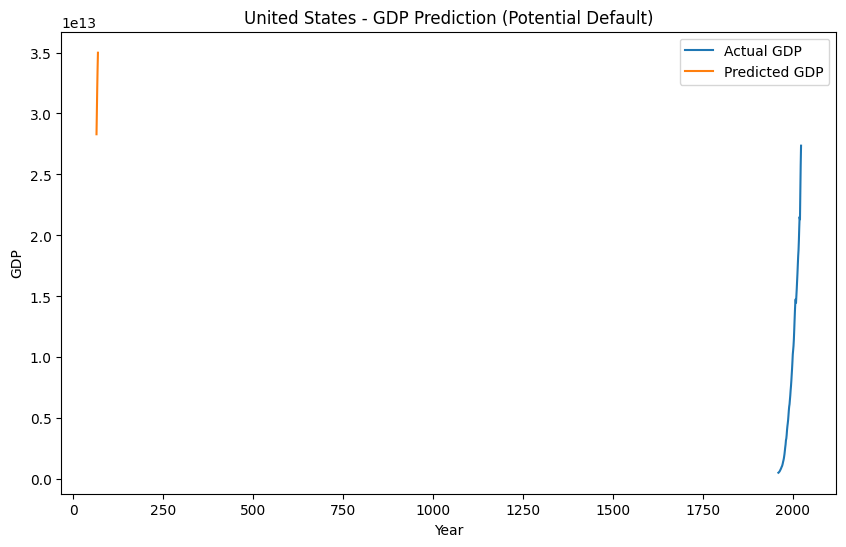

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

countries = data_df_copy.groupby('Country')

for country, country_data in countries:

    if 'Year' in country_data.columns and 'CURRENT_GDP_USD' in country_data.columns:
      country_data = country_data.sort_values('Year')
      country_data = country_data.set_index('Year')

      gdp_ts = country_data['CURRENT_GDP_USD'].dropna()

      if len(gdp_ts) > 0:
          try:
              model = ARIMA(gdp_ts, order=(5,1,0))
              model_fit = model.fit()

              predictions = model_fit.predict(start=len(gdp_ts), end=len(gdp_ts) + 4)

              is_predicted_to_default = country_data['DEFAULT'].iloc[-1] == 1

              if is_predicted_to_default:
                  plt.figure(figsize=(10, 6))
                  plt.plot(gdp_ts, label='Actual GDP')
                  plt.plot(predictions.index, predictions.values, label='Predicted GDP')
                  plt.title(f'{country} - GDP Prediction (Potential Default)')
                  plt.xlabel('Year')
                  plt.ylabel('GDP')
                  plt.legend()
                  plt.show()

          except Exception as e:
              print(f"Error processing {country}: {e}")
      else:
          print(f"Not enough data for {country}")

    else:
      print(f"Country {country} doesn't have the necessary columns")


In [ ]:
import pandas as pd
from statsmodels.tsa.vector_ar.var_model import VAR
import numpy as np

if {'Country', 'Year', 'CURRENT_GDP_USD', 'INFLATION_RATE_IN_PCT', 'TOT_EXT_DEBT_USD', 'TOT_GOVT_DEBT_LCU', 'LONG_EXT_DEBT_USD', 'PUBLIC_OWNED_DEBT_USD', 'PRIVATE_OWNED_DEBT_USD', 'SHORT_TERM_EXT_DEBT',\
    'CUR_VAL_EXT_DEBT', 'EXPORTS', 'IMPORTS', 'TAX_REVENUE_PCT_GDP', 'UNEMPLOYMENT_RATE', 'POP_GROWTH_RATE', 'DEBT_TO_GDP', 'TRADE_BALANCE', 'TRADE_BAL_PCT_GDP', 'DEFAULT'}.issubset(data_df.columns):
    country_data = data_df[['Country', 'Year', 'CURRENT_GDP_USD', 'INFLATION_RATE_IN_PCT', 'TOT_EXT_DEBT_USD', 'TOT_GOVT_DEBT_LCU', 'LONG_EXT_DEBT_USD', 'PUBLIC_OWNED_DEBT_USD', 'PRIVATE_OWNED_DEBT_USD', 'SHORT_TERM_EXT_DEBT',\
    'CUR_VAL_EXT_DEBT', 'EXPORTS', 'IMPORTS', 'TAX_REVENUE_PCT_GDP', 'UNEMPLOYMENT_RATE', 'POP_GROWTH_RATE', 'DEBT_TO_GDP', 'TRADE_BALANCE', 'TRADE_BAL_PCT_GDP', 'DEFAULT']].copy()
    country_groups = country_data.groupby('Country')
    for country, country_df in country_groups:
        country_df = country_df.fillna(0)
        country_df['Year'] = pd.to_datetime(country_df['Year'], errors='coerce')
        country_df = country_df.set_index('Year')
        var_columns = ['CURRENT_GDP_USD', 'INFLATION_RATE_IN_PCT', 'TOT_EXT_DEBT_USD', 'TOT_GOVT_DEBT_LCU', 'LONG_EXT_DEBT_USD', 'PUBLIC_OWNED_DEBT_USD', 'PRIVATE_OWNED_DEBT_USD', 'SHORT_TERM_EXT_DEBT',\
        'CUR_VAL_EXT_DEBT', 'EXPORTS', 'IMPORTS', 'TAX_REVENUE_PCT_GDP', 'UNEMPLOYMENT_RATE', 'POP_GROWTH_RATE', 'DEBT_TO_GDP', 'TRADE_BALANCE', 'TRADE_BAL_PCT_GDP', 'DEFAULT']
        country_var_data = country_df[var_columns]
        if len(country_var_data) >= 5:
            try:
                model = VAR(country_var_data)

                # Adjust maxlags to avoid errors
                maxlags = min(10, int(len(country_var_data)**0.5) - 1, len(country_var_data) // len(var_columns) - 1)
                maxlags = max(1, maxlags)

                if maxlags > 0:
                    results = model.select_order(maxlags=maxlags)

                # Fit the model with the selected or adjusted lag order
                results_fitted = model.fit(maxlags=maxlags)  # or results.aic if select_order is successful

                forecast = results_fitted.forecast(country_var_data.values[-results_fitted.k_ar:], steps=5)
                forecast_df = pd.DataFrame(forecast, columns=var_columns, index=pd.date_range(start=country_df.index[-1] + pd.DateOffset(years=1), periods=5, freq='Y'))
                default_years = forecast_df[forecast_df['DEFAULT'] > 0.5].index.tolist()
                print(f"Predictions for {country}:")
                print(forecast_df)
                print(f"Potential Default Years: {default_years}")

            except np.linalg.LinAlgError:
                print(f"LinAlgError encountered for {country}. Skipping...")
            except ValueError as e:
                if "maxlags is too large for the number of observations and the number of equations" in str(e):
                    print(f"Insufficient data for VAR modeling for {country} with maxlags={maxlags}. Skipping...")
                else:
                    print(f"ValueError encountered for {country}: {e}. Skipping...")
        else:
            print(f"Not enough data for VAR modeling for {country}")
else:
    print("Necessary columns not found in the dataframe")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for Afghanistan. Skipping...
LinAlgError encountered for Africa Eastern and Southern. Skipping...
LinAlgError encountered for Africa Western and Central. Skipping...
LinAlgError encountered for Albania. Skipping...
LinAlgError encountered for Algeria. Skipping...
LinAlgError encountered for American Samoa. Skipping...
LinAlgError encountered for Andorra. Skipping...
LinAlgError encountered for Angola. Skipping...
LinAlgError encountered for Antigua and Barbuda. Skipping...
LinAlgError encountered for Arab World. Skipping...
LinAlgError encountered for Argentina. Skipping...
LinAlgError encountered for Armenia. Skipping...
LinAlgError encountered for Aruba. Skipping...
LinAlgError encountered for Australia. Skipping...
LinAlgError encountered for Austria. Skipping...
LinAlgError encountered for Azerbaijan. Skipping...
LinAlgError encountered for Bahamas, The. Skipping...
LinAlgError encountered for Bahrain. Skipping...
LinAlgError encountered for Bangladesh. Skip

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
<ipython-input-90-571bfdaad8fc>:32: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_df = pd.DataFrame(forecast, columns=var_columns, index=pd.date_range(start=country_df.index[-1] + pd.DateOffset(years=1), periods=5, freq='Y'))
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequ

                               CURRENT_GDP_USD  INFLATION_RATE_IN_PCT  \
1971-12-31 00:00:00.000002023     3.898586e+10             -25.336033   
1972-12-31 00:00:00.000002023     3.016337e+10              97.148156   
1973-12-31 00:00:00.000002023    -8.170468e+10             493.955139   
1974-12-31 00:00:00.000002023    -9.049400e+10             412.505963   
1975-12-31 00:00:00.000002023    -1.063600e+12            4272.911241   

                               TOT_EXT_DEBT_USD  TOT_GOVT_DEBT_LCU  \
1971-12-31 00:00:00.000002023      2.830997e+09      -4.352872e+12   
1972-12-31 00:00:00.000002023     -7.594520e+09      -4.475735e+12   
1973-12-31 00:00:00.000002023     -2.248101e+10      -4.839189e+13   
1974-12-31 00:00:00.000002023     -6.470802e+10      -4.071250e+13   
1975-12-31 00:00:00.000002023     -2.165464e+11      -4.473468e+14   

                               LONG_EXT_DEBT_USD  PUBLIC_OWNED_DEBT_USD  \
1971-12-31 00:00:00.000002023       2.334562e+09           6.7595

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date


LinAlgError encountered for Curacao. Skipping...
LinAlgError encountered for Cyprus. Skipping...
LinAlgError encountered for Czechia. Skipping...
LinAlgError encountered for Denmark. Skipping...
LinAlgError encountered for Djibouti. Skipping...
LinAlgError encountered for Dominica. Skipping...
LinAlgError encountered for Dominican Republic. Skipping...
LinAlgError encountered for Early-demographic dividend. Skipping...
LinAlgError encountered for East Asia & Pacific. Skipping...
LinAlgError encountered for East Asia & Pacific (IDA & IBRD countries). Skipping...
LinAlgError encountered for East Asia & Pacific (excluding high income). Skipping...
LinAlgError encountered for Ecuador. Skipping...
LinAlgError encountered for Egypt, Arab Rep.. Skipping...
LinAlgError encountered for El Salvador. Skipping...
LinAlgError encountered for Equatorial Guinea. Skipping...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for Eritrea. Skipping...
LinAlgError encountered for Estonia. Skipping...
LinAlgError encountered for Eswatini. Skipping...
LinAlgError encountered for Ethiopia. Skipping...
LinAlgError encountered for Euro area. Skipping...
LinAlgError encountered for Europe & Central Asia. Skipping...
LinAlgError encountered for Europe & Central Asia (IDA & IBRD countries). Skipping...
LinAlgError encountered for Europe & Central Asia (excluding high income). Skipping...
LinAlgError encountered for European Union. Skipping...
LinAlgError encountered for Faroe Islands. Skipping...
LinAlgError encountered for Fiji. Skipping...
LinAlgError encountered for Finland. Skipping...
LinAlgError encountered for Fragile and conflict affected situations. Skipping...
LinAlgError encountered for France. Skipping...
LinAlgError encountered for French Polynesia. Skipping...
LinAlgError encountered for Gabon. Skipping...
LinAlgError encountered for Gambia, The. Skipping...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for Georgia. Skipping...
LinAlgError encountered for Germany. Skipping...
LinAlgError encountered for Ghana. Skipping...
LinAlgError encountered for Gibraltar. Skipping...
LinAlgError encountered for Greece. Skipping...
LinAlgError encountered for Greenland. Skipping...
LinAlgError encountered for Grenada. Skipping...
LinAlgError encountered for Guam. Skipping...
LinAlgError encountered for Guatemala. Skipping...
LinAlgError encountered for Guinea. Skipping...
LinAlgError encountered for Guinea-Bissau. Skipping...
LinAlgError encountered for Guyana. Skipping...
LinAlgError encountered for Haiti. Skipping...
LinAlgError encountered for Heavily indebted poor countries (HIPC). Skipping...
LinAlgError encountered for High income. Skipping...
LinAlgError encountered for Honduras. Skipping...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for Hong Kong SAR, China. Skipping...
LinAlgError encountered for Hungary. Skipping...
LinAlgError encountered for IBRD only. Skipping...
LinAlgError encountered for IDA & IBRD total. Skipping...
LinAlgError encountered for IDA blend. Skipping...
LinAlgError encountered for IDA only. Skipping...
LinAlgError encountered for IDA total. Skipping...
LinAlgError encountered for Iceland. Skipping...
LinAlgError encountered for India. Skipping...
LinAlgError encountered for Indonesia. Skipping...
LinAlgError encountered for Iran, Islamic Rep.. Skipping...
LinAlgError encountered for Iraq. Skipping...
LinAlgError encountered for Ireland. Skipping...
LinAlgError encountered for Isle of Man. Skipping...
LinAlgError encountered for Israel. Skipping...
LinAlgError encountered for Italy. Skipping...
LinAlgError encountered for Jamaica. Skipping...
LinAlgError encountered for Japan. Skipping...
LinAlgError encountered for Jordan. Skipping...
LinAlgError encountered for Kazakh

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for Kiribati. Skipping...
LinAlgError encountered for Korea, Dem. People's Rep.. Skipping...
LinAlgError encountered for Korea, Rep.. Skipping...
LinAlgError encountered for Kosovo. Skipping...
LinAlgError encountered for Kuwait. Skipping...
LinAlgError encountered for Kyrgyz Republic. Skipping...
LinAlgError encountered for Lao PDR. Skipping...
LinAlgError encountered for Late-demographic dividend. Skipping...
LinAlgError encountered for Latin America & Caribbean. Skipping...
LinAlgError encountered for Latin America & Caribbean (excluding high income). Skipping...
LinAlgError encountered for Latin America & the Caribbean (IDA & IBRD countries). Skipping...
LinAlgError encountered for Latvia. Skipping...
LinAlgError encountered for Least developed countries: UN classification. Skipping...
LinAlgError encountered for Lebanon. Skipping...
LinAlgError encountered for Lesotho. Skipping...
LinAlgError encountered for Liberia. Skipping...
LinAlgError encountered for 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date


LinAlgError encountered for Mauritius. Skipping...
LinAlgError encountered for Mexico. Skipping...
LinAlgError encountered for Micronesia, Fed. Sts.. Skipping...
LinAlgError encountered for Middle East & North Africa. Skipping...
LinAlgError encountered for Middle East & North Africa (IDA & IBRD countries). Skipping...
LinAlgError encountered for Middle East & North Africa (excluding high income). Skipping...
LinAlgError encountered for Middle income. Skipping...
LinAlgError encountered for Moldova. Skipping...
LinAlgError encountered for Monaco. Skipping...
LinAlgError encountered for Mongolia. Skipping...
LinAlgError encountered for Montenegro. Skipping...
LinAlgError encountered for Morocco. Skipping...
LinAlgError encountered for Mozambique. Skipping...
LinAlgError encountered for Myanmar. Skipping...
LinAlgError encountered for Namibia. Skipping...
LinAlgError encountered for Nauru. Skipping...
LinAlgError encountered for Nepal. Skipping...
LinAlgError encountered for Netherlands

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date


LinAlgError encountered for Palau. Skipping...
LinAlgError encountered for Panama. Skipping...
LinAlgError encountered for Papua New Guinea. Skipping...
LinAlgError encountered for Paraguay. Skipping...
LinAlgError encountered for Peru. Skipping...
LinAlgError encountered for Philippines. Skipping...
LinAlgError encountered for Poland. Skipping...
LinAlgError encountered for Portugal. Skipping...
LinAlgError encountered for Post-demographic dividend. Skipping...
LinAlgError encountered for Pre-demographic dividend. Skipping...
LinAlgError encountered for Puerto Rico. Skipping...
LinAlgError encountered for Qatar. Skipping...
LinAlgError encountered for Romania. Skipping...
LinAlgError encountered for Russian Federation. Skipping...
LinAlgError encountered for Rwanda. Skipping...
LinAlgError encountered for Samoa. Skipping...
LinAlgError encountered for San Marino. Skipping...
LinAlgError encountered for Sao Tome and Principe. Skipping...
LinAlgError encountered for Saudi Arabia. Skipp

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date


LinAlgError encountered for South Sudan. Skipping...
LinAlgError encountered for Spain. Skipping...
LinAlgError encountered for Sri Lanka. Skipping...
LinAlgError encountered for St. Kitts and Nevis. Skipping...
LinAlgError encountered for St. Lucia. Skipping...
LinAlgError encountered for St. Martin (French part). Skipping...
LinAlgError encountered for St. Vincent and the Grenadines. Skipping...
LinAlgError encountered for Sub-Saharan Africa. Skipping...
LinAlgError encountered for Sub-Saharan Africa (IDA & IBRD countries). Skipping...
LinAlgError encountered for Sub-Saharan Africa (excluding high income). Skipping...
LinAlgError encountered for Sudan. Skipping...
LinAlgError encountered for Suriname. Skipping...
LinAlgError encountered for Sweden. Skipping...
LinAlgError encountered for Switzerland. Skipping...
LinAlgError encountered for Syrian Arab Republic. Skipping...
LinAlgError encountered for Tajikistan. Skipping...
LinAlgError encountered for Tanzania. Skipping...
LinAlgErr

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

LinAlgError encountered for United Kingdom. Skipping...
LinAlgError encountered for United States. Skipping...
LinAlgError encountered for Upper middle income. Skipping...
LinAlgError encountered for Uruguay. Skipping...
LinAlgError encountered for Uzbekistan. Skipping...
LinAlgError encountered for Vanuatu. Skipping...
LinAlgError encountered for Venezuela, RB. Skipping...
LinAlgError encountered for Viet Nam. Skipping...
LinAlgError encountered for Virgin Islands (U.S.). Skipping...
LinAlgError encountered for West Bank and Gaza. Skipping...
LinAlgError encountered for World. Skipping...
LinAlgError encountered for Yemen, Rep.. Skipping...
LinAlgError encountered for Zambia. Skipping...
LinAlgError encountered for Zimbabwe. Skipping...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_date

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

feature_columns = ['CURRENT_GDP_USD', 'INFLATION_RATE_IN_PCT', 'TOT_EXT_DEBT_USD', 'TOT_GOVT_DEBT_LCU',
                   'LONG_EXT_DEBT_USD', 'PUBLIC_OWNED_DEBT_USD', 'PRIVATE_OWNED_DEBT_USD', 'SHORT_TERM_EXT_DEBT',
                   'CUR_VAL_EXT_DEBT', 'EXPORTS', 'IMPORTS', 'TAX_REVENUE_PCT_GDP', 'UNEMPLOYMENT_RATE',
                   'POP_GROWTH_RATE', 'DEBT_TO_GDP', 'TRADE_BALANCE', 'TRADE_BAL_PCT_GDP']

target = 'DEFAULT'  # The target column to predict

def create_sequences(data, target, seq_length=10):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]  # Input sequence of length `seq_length`
        sequences.append(seq)
        targets.append(target[i+seq_length])  # Target is the value after the sequence
    return np.array(sequences), np.array(targets)

countries = data_df['Country'].unique()  # Get unique countries
X_list = []
y_list = []

for country in countries:
    country_data = data_df[data_df['Country'] == country]
    scaler = StandardScaler()  # No feature_range here
    scaled_country_data = scaler.fit_transform(country_data[feature_columns].values)  # Scale the country-specific data

    # Create sequences for this country
    X_country, y_country = create_sequences(scaled_country_data, country_data[target].values, seq_length=10)

    # Append sequences to the list
    X_list.append(X_country)
    y_list.append(y_country)

X = np.concatenate(X_list, axis=0)
y = np.concatenate(y_list, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.fc = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        lstm_out, (hn, cn) = self.lstm(x)
        predictions = self.fc(lstm_out[:, -1, :])  # Use the output of the last time step
        return predictions

class_weights = torch.tensor([1.0, 100.0])  # Adjust weight for class imbalance
loss_function = nn.BCEWithLogitsLoss(pos_weight=class_weights)
model = LSTMModel(input_size=len(feature_columns), hidden_layer_size=50, output_size=1)
loss_function = nn.BCEWithLogitsLoss()  # For binary classification (use BCE with logits for stability)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 100
for epoch in range(epochs):
    model.train()

    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(X_train_tensor)

    # Calculate the loss
    loss = loss_function(y_pred.squeeze(), y_train_tensor)

    # Backward pass
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item()}")

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    test_loss = loss_function(y_pred_test.squeeze(), y_test_tensor)
    print(f"Test Loss: {test_loss.item()}")

    # Convert predictions to a usable form (e.g., probability of default)
    y_pred_test = y_pred_test.squeeze().numpy()

    # Example: Convert predictions to binary default predictions (0 or 1) using a threshold (e.g., 0.5)
    threshold = 0.5
    predictions = (y_pred_test > threshold).astype(int)

    # Print classification report and accuracy
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("Accuracy Score:", accuracy_score(y_test, predictions))

# Print the first 10 predictions
print("Predictions (next 10 years):", predictions[:10])


Epoch [0/100], Loss: 0.6907540559768677
Epoch [10/100], Loss: 0.6121394634246826
Epoch [20/100], Loss: 0.4854447543621063
Epoch [30/100], Loss: 0.28122299909591675
Epoch [40/100], Loss: 0.12144798785448074
Epoch [50/100], Loss: 0.08670645207166672
Epoch [60/100], Loss: 0.083725206553936
Epoch [70/100], Loss: 0.0837031826376915
Epoch [80/100], Loss: 0.08346884697675705
Epoch [90/100], Loss: 0.08307617902755737
Test Loss: 0.017796974629163742
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2871
           1       0.00      0.00      0.00         2

    accuracy                           1.00      2873
   macro avg       0.50      0.50      0.50      2873
weighted avg       1.00      1.00      1.00      2873

Accuracy Score: 0.9993038635572572
Predictions (next 10 years): [0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
